In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sonar.all-data')

In [4]:
df.shape

(207, 61)

In [5]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [6]:
df_x = df.loc[:,'0.0200':'0.0032']
df_y=df.loc[:,'R']


In [7]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.3,random_state=4)

In [8]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
from sklearn.metrics import accuracy_score
pr=rf.predict(x_test)
accuracy=accuracy_score(y_test,pr)
print (accuracy)

0.7936507936507936


In [10]:
param_grid=[{'n_estimators':range(1 ,10) , 'max_depth' : range(1,10)}]
print(param_grid)

[{'n_estimators': range(1, 10), 'max_depth': range(1, 10)}]


In [11]:
grid= GridSearchCV(rf,param_grid,cv=3)

In [12]:
grid.fit(df_x,df_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': range(1, 10), 'max_depth': range(1, 10)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
grid.best_score_

0.6956521739130435

In [14]:
grid.best_params_

{'max_depth': 2, 'n_estimators': 4}

In [15]:
predict = grid.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predict)
accuracy

0.6507936507936508

In [17]:
dt=DecisionTreeClassifier()
params={'criterion':['gini','entropy'],'max_depth':range(1,20),'splitter':['random']}

In [18]:
grid=GridSearchCV(dt,params,cv=10)

In [19]:
grid.fit(df_x,df_y)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 20), 'splitter': ['random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
grid.best_score_

0.6956521739130435

In [21]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 17, 'splitter': 'random'}

In [22]:
predict=grid.predict(x_test)

In [23]:
print(predict)

['R' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'M'
 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'R'
 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'M'
 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'M']


In [24]:
accuracy=accuracy_score(y_test,predict)
accuracy

1.0

In [25]:
from sklearn.svm import SVC

In [26]:
cls=SVC(kernel='linear', random_state=0)
cls.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [27]:
y_predict=cls.predict(x_test)

In [28]:
accuracy=accuracy_score(y_test,y_predict)

In [29]:
accuracy

0.7619047619047619

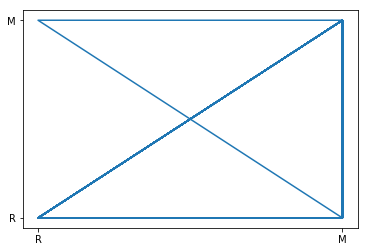

In [43]:
import matplotlib.pyplot as plt
plt.plot(y_predict,y_test)
plt.show()

In [30]:
par=[{'C':[1,10,100,1000],'kernel':['linear']},{'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid=GridSearchCV(cls,par,cv=10)

In [31]:
grid.fit(df_x,df_y)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
grid.cv_results_


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\

{'mean_fit_time': array([0.00559585, 0.00468822, 0.02313349, 0.161639  , 0.00625031,
        0.00468771, 0.0062501 , 0.00468748, 0.0031251 , 0.0062501 ,
        0.0046876 , 0.00312514, 0.00624988, 0.00625014, 0.00468767,
        0.00625014, 0.00781262, 0.0046875 , 0.00781245, 0.00625014,
        0.00781236, 0.00781271, 0.00468748, 0.00468779, 0.00468748,
        0.00781248, 0.00312493, 0.00468774, 0.00655541, 0.0046876 ,
        0.00625005, 0.0093751 , 0.00468755, 0.00625024, 0.00625019,
        0.00781255, 0.00625012, 0.00468802, 0.00625014, 0.00625021]),
 'std_fit_time': array([0.00319545, 0.00716137, 0.00825857, 0.09945342, 0.00765504,
        0.0071606 , 0.00765477, 0.00716024, 0.00625019, 0.00765477,
        0.00716042, 0.00625029, 0.00765451, 0.00765483, 0.00716053,
        0.00765483, 0.00781262, 0.00716027, 0.00781245, 0.00765483,
        0.00781236, 0.00781271, 0.00716024, 0.00716071, 0.00716024,
        0.00781248, 0.00624986, 0.00716064, 0.0080458 , 0.00716042,
        0.007

In [33]:
grid.best_params_

{'C': 1000, 'kernel': 'linear'}

In [34]:
pred=grid.predict(x_test)

In [35]:
accuracy=accuracy_score(y_test,pred)

In [36]:
accuracy

0.873015873015873

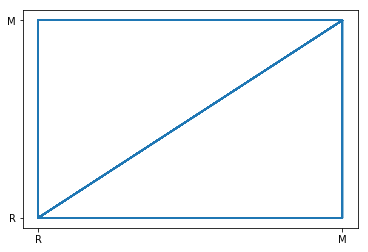

In [39]:
import matplotlib.pyplot as plt
plt.plot(pred,y_test)
plt.show()